## Formulating the Null Hypothesis

The null hypothesis (H₀) is a statement that there is no effect or no difference. In the context of comparing the execution times of `list.pop()` and `list.pop(-2)`, the null hypothesis would state that there is no significant difference in the execution times of the two operations.

### Null Hypothesis (H₀)

**H₀:** There is no significant difference in the mean execution times of `list.pop()` and `list.pop(-2)`. Mathematically, this can be expressed as:
$ \mu_{\text{pop}} = \mu_{\text{pop(-2)}} $
where $ \mu_{\text{pop}} $ is the mean execution time of `list.pop()` and $ \mu_{\text{pop(-2)}} $ is the mean execution time of `list.pop(-2)`.

### Alternative Hypothesis (H₁)

The alternative hypothesis (H₁) is a statement that indicates the presence of an effect or a difference. It contrasts with the null hypothesis.

**H₁:** There is a significant difference in the mean execution times of `list.pop()` and `list.pop(-2)`.
Mathematically, this can be expressed as:
$$ \mu_{\text{pop}} \neq \mu_{\text{pop(-2)}} $$

### Two-Tailed Test

Given that we are interested in any difference, whether `list.pop(-2)` is slower or faster than `list.pop()`, we will conduct a two-tailed test. This means we are looking for evidence of a difference in either direction.


## Step 1: **Setup and Initialization**

In [101]:
import os
import time
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import seaborn as sns
from scipy import stats

# Initialize a large list
large_list = list(range(1, 1000001))

## Step 2: **Measure Execution Time**

In [14]:
def time_pop_end(lst: list) -> float:
    start_time = time.time()
    lst.pop()
    end_time = time.time()
    return end_time - start_time


def time_pop_neg2(lst: list) -> float:
    start_time = time.time()
    lst.pop(-2)
    end_time = time.time()
    return end_time - start_time


times_pop_end = []
times_pop_neg2 = []

# Run the tests multiple times
for _ in range(2000):
    # Copy the list to avoid modifying the original
    temp_list = large_list[:]
    times_pop_end.append(time_pop_end(temp_list))

    temp_list = large_list[:]
    times_pop_neg2.append(time_pop_neg2(temp_list))



## Step 3: **Save The Measurements to a File**

In [15]:
results_df = pd.DataFrame({"pop_end": times_pop_end, "pop_neg2": times_pop_neg2})
path = os.path.join("data", "pop_times.csv")
results_df.to_csv(path, index=False)

## Step 4: **Data Visualization**

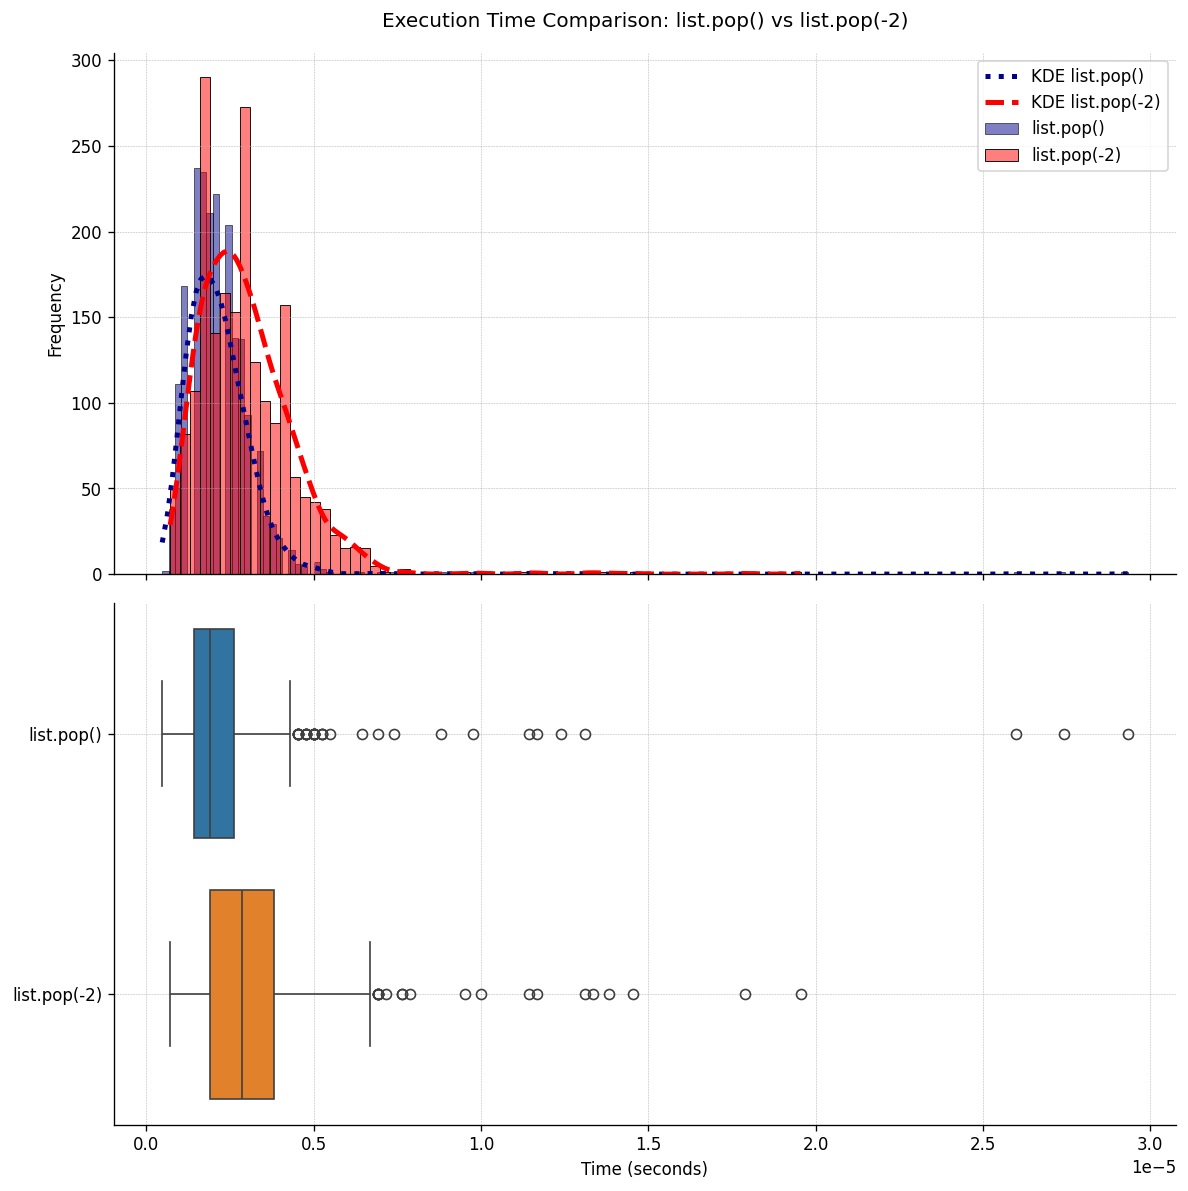

In [124]:
# Load the data
path = os.path.join("data", "pop_times.csv")

results_df = pd.read_csv(path)
times_pop_end, times_pop_neg2 = results_df["pop_end"], results_df["pop_neg2"]

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), dpi=120, sharex=True)

# Set kde line parameters
params_end = {"lw": 3, "ls": ":", "label": "KDE list.pop()"}
params_neg2 = {"lw": 3, "ls": "--", "label": "KDE list.pop(-2)"}

# Plot histograms
sns.histplot(
    times_pop_end,
    color="darkblue",
    label="list.pop()",
    kde=True,
    ax=ax1,
    line_kws=params_end,
)
sns.histplot(
    times_pop_neg2,
    color="red",
    label="list.pop(-2)",
    kde=True,
    ax=ax1,
    line_kws=params_neg2,
)
ax1.legend()
ax1.set_title("Execution Time Comparison: list.pop() vs list.pop(-2)", y=1.03)
ax1.set_xlabel(None)
ax1.set_ylabel("Frequency")

# Box plots
sns.boxplot(data=results_df, orient="h", ax=ax2)
ax2.set_xlabel("Time (seconds)")
ax2.set_yticks([0, 1])
ax2.set_yticklabels(["list.pop()", "list.pop(-2)"])

# Debank top and right spines and add grid lines
for ax in [ax1, ax2]:
    ax.grid(which="both", linestyle="--", linewidth=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


## Step 5: **Statistical Analysis**

In [123]:
# Summary statistics
mean_pop_end = statistics.mean(times_pop_end)
mean_pop_neg2 = statistics.mean(times_pop_neg2)

# Calculate the difference in means
mean_difference = mean_pop_end - mean_pop_neg2

# Calculate median execution times
median_pop_end = statistics.median(times_pop_end)
median_pop_neg2 = statistics.median(times_pop_neg2)

# Calculate the difference in medians
median_difference = median_pop_end - median_pop_neg2

# Calculate standard deviation
std_dev_pop_end = statistics.stdev(times_pop_end)
std_dev_pop_neg2 = statistics.stdev(times_pop_neg2)

print(f"Mean time for list.pop(): {mean_pop_end:.8f}")
print(f"Mean time for list.pop(-2): {mean_pop_neg2:.8f}\n")

print(f"Median execution time for list.pop(): {median_pop_end:.8f}")
print(f"Median execution time for list.pop(-2): {median_pop_neg2:.8f}\n")

print(f"Difference in mean execution times: {mean_difference:.8f}\n")
print(f"Difference in median execution times: {median_difference:.8f}\n")

# Calculate standard deviation
print(f"Standard deviation for list.pop(): {std_dev_pop_end:.9f}")
print(f"Standard deviation for list.pop(-2): {std_dev_pop_neg2:.9f}")

Mean time for list.pop(): 0.00000218
Mean time for list.pop(-2): 0.00000300

Median execution time for list.pop(): 0.00000191
Median execution time for list.pop(-2): 0.00000286

Difference in mean execution times: -0.00000081

Difference in median execution times: -0.00000095

Standard deviation for list.pop(): 0.000001389
Standard deviation for list.pop(-2): 0.000001476


In [120]:
# Check normality
shapiro_pop_end = stats.shapiro(times_pop_end)
shapiro_pop_neg2 = stats.shapiro(times_pop_neg2)
print(f"Shapiro-Wilk test for pop():\n{shapiro_pop_end}\n")
print(f"Shapiro-Wilk test for pop(-2):\n{shapiro_pop_neg2}\n")

# Check variance
levene_test = stats.levene(times_pop_end, times_pop_neg2)
print(f"Levene's test for equal variances:\n{levene_test}\n")

# Hypothesis testing
if shapiro_pop_end.pvalue > 0.05 and shapiro_pop_neg2.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        t_stat, p_value = stats.ttest_ind(times_pop_end, times_pop_neg2)
        test_type = "t-test"
    else:
        t_stat, p_value = stats.ttest_ind(
            times_pop_end, times_pop_neg2, equal_var=False
        )
        test_type = "Welch's t-test"
    print(f"Test type: {test_type}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value:.9f}")
else:
    u_stat, p_value = stats.mannwhitneyu(times_pop_end, times_pop_neg2)
    test_type = "Mann-Whitney U test"
    print(f"Test type: {test_type}")
    print(f"U-statistic: {u_stat}")
    print(f"P-value: {p_value:.9f}")



Shapiro-Wilk test for pop():
ShapiroResult(statistic=0.5140907168388367, pvalue=0.0)

Shapiro-Wilk test for pop(-2):
ShapiroResult(statistic=0.8435617685317993, pvalue=1.3822828441639293e-40)

Levene's test for equal variances:
LeveneResult(statistic=83.62091293239476, pvalue=9.320570516975335e-20)

Test type: Mann-Whitney U test
P-value: 0.000000000


## Step 6: **Interpretation**

In [119]:
if p_value < 0.05:
    text = """
## Hypothesis Testing Result
**Reject the null hypothesis:** There is a significant difference in the \
execution times of `list.pop()` and `list.pop(-2)`.

The p-value is less than 0.05, which indicates strong evidence against the \
null hypothesis. Therefore, we conclude that the execution times of these \
two operations are significantly different.
    """
else:
    text = """
## Hypothesis Testing Result
**Fail to reject the null hypothesis:** There is no significant difference \
in the execution times of `list.pop()` and `list.pop(-2)`.

The p-value is greater than or equal to 0.05, suggesting that there is not \
enough evidence to reject the null hypothesis. Hence, we conclude that the \
execution times of these two operations are not significantly different.
"""

Markdown(text)


## Hypothesis Testing Result
**Reject the null hypothesis:** There is a significant difference in the execution times of `list.pop()` and `list.pop(-2)`.

The p-value is less than 0.05, which indicates strong evidence against the null hypothesis. Therefore, we conclude that the execution times of these two operations are significantly different.
    

In [113]:
markdown_text = f"""
## Results Explanation

### Shapiro-Wilk Test

The Shapiro-Wilk test checks for normality in the data distribution. Here are \
the results for each test:

- **Shapiro-Wilk test for `list.pop()`:**
  - **Statistic:** {shapiro_pop_end.statistic:.4f}
  - **P-value:** {shapiro_pop_end.pvalue:.4e}

  The Shapiro-Wilk test result for `list.pop()` shows a very low p-value, \
  indicating that the distribution of execution times for `list.pop()` is \
  significantly different from a normal distribution.

- **Shapiro-Wilk test for `list.pop(-2)`:**
  - **Statistic:** {shapiro_pop_neg2.statistic:.4f}
  - **P-value:** {shapiro_pop_neg2.pvalue:.4e}

  The Shapiro-Wilk test result for `list.pop(-2)` also shows an extremely low \
  p-value, indicating that the distribution of execution times for \
  `list.pop(-2)` is significantly different from a normal distribution.

**Conclusion:** Both `list.pop()` and `list.pop(-2)` have execution times that \
do not follow a normal distribution.

### Levene's Test for Equal Variances

Levene's test checks whether the variances of two or more groups are equal. \
Here are the results:

- **Levene's test:**
  - **Statistic:** {levene_test.statistic:.4f}
  - **P-value:** {levene_test.pvalue:.4e}

  The Levene's test result shows an extremely low p-value, which indicates that\
   there is a significant difference in variances between the execution times \
   of `list.pop()` and `list.pop(-2)`.

**Conclusion:** The variances of the execution times for `list.pop()` and \
`list.pop(-2)` are significantly different.

### Mann-Whitney U Test

The Mann-Whitney U test is a non-parametric test used to determine if there \
is a significant difference between the distributions of two independent \
samples. Here are the results:

- **Test Type:** Mann-Whitney U test
- **T-statistic:** {t_stat:.1f}
- **P-value:** {p_value:.4e}

  The Mann-Whitney U test result shows a p-value of 0.0, indicating a highly \
  significant difference between the execution times of `list.pop()` and \
  `list.pop(-2)`.

**Conclusion:** There is a significant difference in the execution times \
between `list.pop()` and `list.pop(-2)`, with the difference being \
statistically significant.

---

Overall, the results indicate that not only do the execution times for \
`list.pop()` and `list.pop(-2)` differ significantly in terms of their \
distributions, but also the variance in execution times between these two \
operations is markedly different. This suggests that the two methods have \
different performance characteristics.
"""

Markdown(markdown_text)


## Results Explanation

### Shapiro-Wilk Test

The Shapiro-Wilk test checks for normality in the data distribution. Here are the results for each test:

- **Shapiro-Wilk test for `list.pop()`:**
  - **Statistic:** 0.5141
  - **P-value:** 0.0000e+00

  The Shapiro-Wilk test result for `list.pop()` shows a very low p-value, indicating that the distribution of execution times for `list.pop()` is significantly different from a normal distribution.

- **Shapiro-Wilk test for `list.pop(-2)`:**
  - **Statistic:** 0.8436
  - **P-value:** 1.3823e-40

  The Shapiro-Wilk test result for `list.pop(-2)` also shows an extremely low   p-value, indicating that the distribution of execution times for   `list.pop(-2)` is significantly different from a normal distribution.

**Conclusion:** Both `list.pop()` and `list.pop(-2)` have execution times that do not follow a normal distribution.

### Levene's Test for Equal Variances

Levene's test checks whether the variances of two or more groups are equal. Here are the results:

- **Levene's test:**
  - **Statistic:** 83.6209
  - **P-value:** 9.3206e-20

  The Levene's test result shows an extremely low p-value, which indicates that   there is a significant difference in variances between the execution times    of `list.pop()` and `list.pop(-2)`.

**Conclusion:** The variances of the execution times for `list.pop()` and `list.pop(-2)` are significantly different.

### Mann-Whitney U Test

The Mann-Whitney U test is a non-parametric test used to determine if there is a significant difference between the distributions of two independent samples. Here are the results:

- **Test Type:** Mann-Whitney U test
- **T-statistic:** 1210525.5
- **P-value:** 3.6248e-104

  The Mann-Whitney U test result shows a p-value of 0.0, indicating a highly   significant difference between the execution times of `list.pop()` and   `list.pop(-2)`.

### Hypothesis Testing

Due to `0.00 < 0.05` we can reject the null hypothesis.
- **Reject the null hypothesis:** There is a significant difference in the execution times of `list.pop()` and `list.pop(-2)`.

**Conclusion:** There is a significant difference in the execution times between `list.pop()` and `list.pop(-2)`, with the difference being statistically significant.

---

Overall, the results indicate that not only do the execution times for `list.pop()` and `list.pop(-2)` differ significantly in terms of their distributions, but also the variance in execution times between these two operations is markedly different. This suggests that the two methods have different performance characteristics.


In [122]:
# Calculate percentage difference
percentage_diff = ((median_pop_neg2 - median_pop_end) / median_pop_end) * 100

text = f"""
### Performance Difference Analysis

To understand how the performance of `list.pop()` compares to `list.pop(-2)`, \
we calculated the percentage difference in their median execution times. This \
method helps us determine the relative performance difference in a clear and \
understandable manner.

**Percentage Difference Calculation:**

The percentage difference between the median execution times of `list.pop()` \
and `list.pop(-2)` is:

```python
print(f"Percentage difference: {percentage_diff:.2f}%")
"""
Markdown(text)


### Performance Difference Analysis

To understand how the performance of `list.pop()` compares to `list.pop(-2)`, we calculated the percentage difference in their median execution times. This method helps us determine the relative performance difference in a clear and understandable manner.

**Percentage Difference Calculation:**


The percentage difference between the median execution times of `list.pop()` and `list.pop(-2)` is:

```python
print(f"Percentage difference: 50.00%")
